In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
dataset = pd.read_excel('茶叶数据集.xls')

In [3]:
dataset.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,品牌,茶种类,省份,城市,包装方式,包装种类,净含量,商品详情,原产地,收益
0,2020新茶上市八马茶叶明前龙井绿茶特级浙江龙井春茶125g,158.0,八马旗舰店,广东深圳,334,334,871.0,八马,浙江龙井,浙江省,杭州市,包装,罐装,125,产品参数：\n生产许可证编号：SC11433010613458\n厂名：杭州正一心茶业有限公...,0,52772.0
1,王氏雄风2020年新茶正宗西湖泉龙井茶特级明前绿茶散装茶叶500g,488.0,王氏雄风茶业,福建泉州,7642,7352,6874.0,王氏雄风,西湖龙井,浙江省,杭州市,包装,罐装,500,生产许可证编号:SC11433010613667\n厂名:杭州绿颐茶业有限公司\n厂址:浙江...,0,3729296.0
2,闽丹2020新茶正宗杭州西湖龙井茶叶特级明前雨前绿茶散礼盒装300g,368.0,闽丹茶叶旗舰店,浙江杭州,6677,6677,6086.0,闽丹,西湖龙井,浙江省,杭州市,包装,罐装,300,产品参数：\n生产许可证编号：SC11433010613667\n厂名：杭州绿颐茶业有限公司...,1,2457136.0
3,正山王2020新茶正宗明前浓香龙井茶叶500g西湖区绿茶高山龙井春茶,280.0,正山王旗舰店,福建泉州,2546,2546,3709.0,正山王,钱塘龙井,浙江省,杭州市,包装,罐装,500,产品参数：\n生产许可证编号：SC11433010613667\n厂名：杭州绿颐茶业有限公司...,0,712880.0
4,2020年新茶杭州西湖泉牌龙井茶特级明前绿茶散装礼盒装茶叶500g,258.0,王氏雄风茶业,浙江杭州,8404,41590,17118.0,王氏雄风,西湖龙井,浙江省,杭州市,包装,罐装,500,生产许可证编号:SC11433010613667\n厂名:杭州绿颐茶业有限公司\n厂址:浙江...,1,2168232.0


In [4]:
dataset = dataset.drop(['商品名','店铺名称','商品详情','店铺位置','省份','城市'],axis=1)

In [5]:
t = list(dataset['品牌'].unique())

In [6]:
dataset = dataset.drop(['品牌'],axis=1)

In [7]:
dataset.head()

,单价/元,商品月销,商品评论数,商品人气,茶种类,省份,包装方式,包装种类,净含量,原产地,收益
0,158.0,334,334,871.0,浙江龙井,浙江省,包装,罐装,125,0,52772.0
1,488.0,7642,7352,6874.0,西湖龙井,浙江省,包装,罐装,500,0,3729296.0
2,368.0,6677,6677,6086.0,西湖龙井,浙江省,包装,罐装,300,1,2457136.0
3,280.0,2546,2546,3709.0,钱塘龙井,浙江省,包装,罐装,500,0,712880.0
4,258.0,8404,41590,17118.0,西湖龙井,浙江省,包装,罐装,500,1,2168232.0


In [11]:
dataset.groupby('省份')['收益'].mean()

省份
云南省    166862.679487
四川省     18322.502500
安徽省     55956.147264
广东省    115821.000000
江苏省     64494.219000
浙江省    322060.003015
福建省    865555.233137
Name: 收益, dtype: float64

In [8]:
print(dataset.dtypes)

单价/元     float64
商品月销       int64
商品评论数      int64
商品人气     float64
茶种类       object
包装方式      object
包装种类      object
净含量        int64
原产地        int64
收益       float64
dtype: object


In [9]:
dataset.isin(['none']).sum()

单价/元      0
商品月销      0
商品评论数     0
商品人气      0
茶种类       0
包装方式      0
包装种类     80
净含量       0
原产地       0
收益        0
dtype: int64

In [10]:
dataset.replace('none',0,inplace=True)

In [11]:
dataset.isin(['none']).sum()

单价/元     0
商品月销     0
商品评论数    0
商品人气     0
茶种类      0
包装方式     0
包装种类     0
净含量      0
原产地      0
收益       0
dtype: int64

In [12]:
print('Dataset shape:', dataset.shape)

Dataset shape: (1201, 10)


In [13]:
dataset = dataset[~(dataset.astype(str) == '开化龙顶').any(1)]
dataset = dataset[~(dataset.astype(str) == '大佛龙井').any(1)]
dataset = dataset[~(dataset.astype(str) == '峨眉山茶').any(1)]
dataset = dataset[~(dataset.astype(str) == '蒙顶石花').any(1)]
dataset = dataset[~(dataset.astype(str) == '越州龙井').any(1)]
dataset = dataset[~(dataset.astype(str) == '滇红').any(1)]

In [14]:
print('Dataset shape:', dataset.shape)

Dataset shape: (1191, 10)


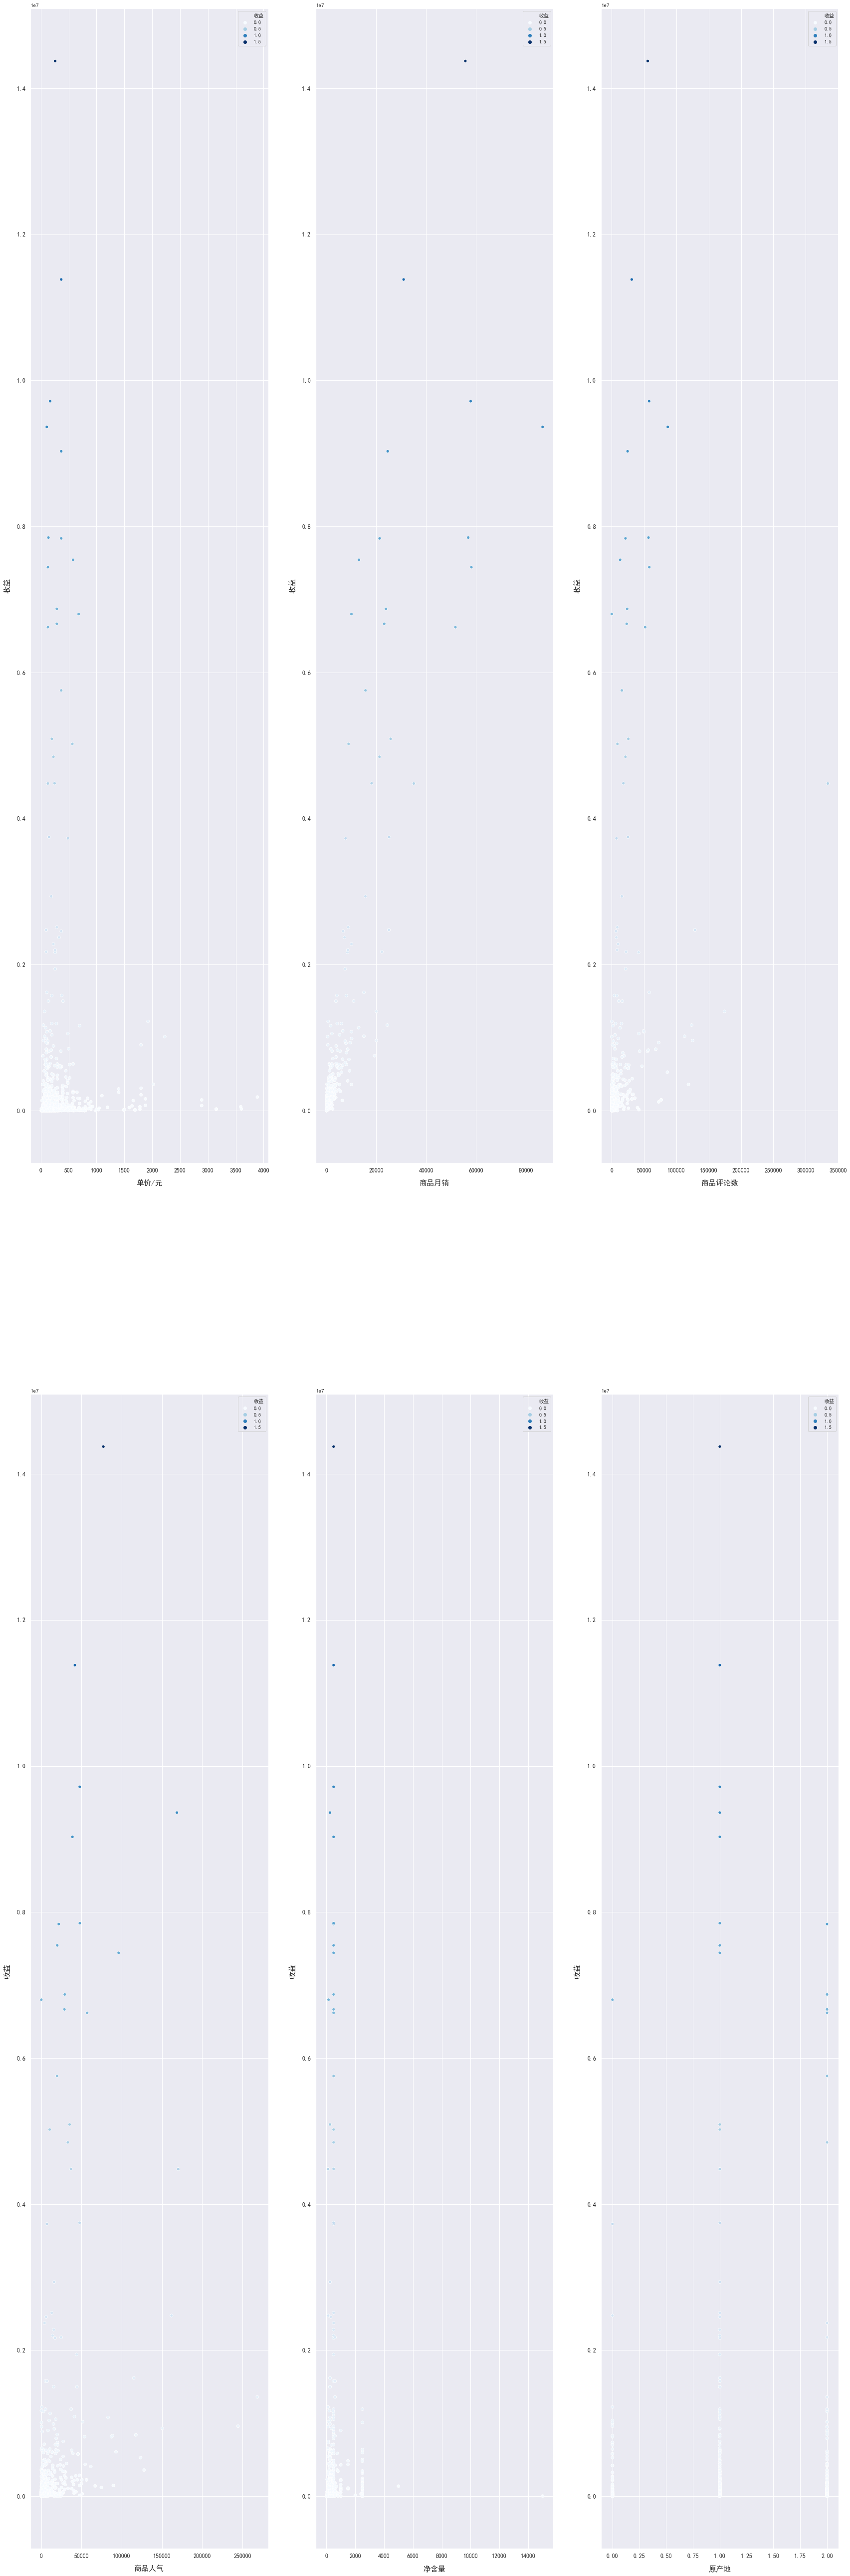

In [15]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

numeric_dtypes = ['int64','float64']
numeric = []
for i in dataset.columns:
    if dataset[i].dtype in numeric_dtypes:
        if i in ['收益']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(dataset[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='收益', hue='收益', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('收益', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

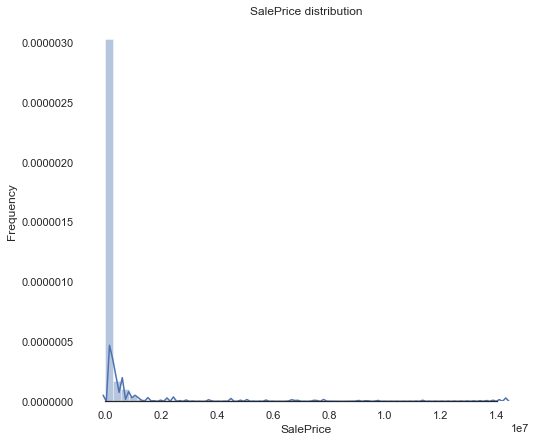

In [16]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [17]:
# log(1+x) transform
dataset["收益"] = np.log1p(dataset["收益"])


 mu = 9.96 and sigma = 2.32



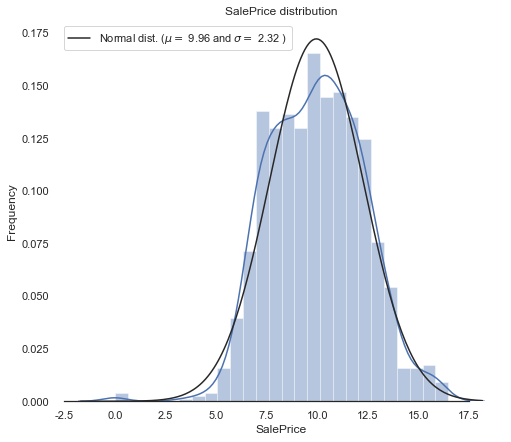

In [18]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['收益'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [19]:
s1 = list(dataset['茶种类'].unique())
s2 = list(dataset['包装方式'].unique())
s3 = list(dataset['包装种类'].unique())
print(s1," ",s2," ",s3)
x1 = pd.DataFrame(dataset['茶种类'].value_counts())
x2 = pd.DataFrame(dataset['包装方式'].value_counts())
x3 = pd.DataFrame(dataset['包装种类'].value_counts())
print(x1,' ',x2,' ',x3)

['浙江龙井', '西湖龙井', '钱塘龙井', '安吉白茶', '金骏眉', '铁观音', '正山小种', '大红袍', '碧螺春', '雀舌', '太平猴魁', '祁门红茶', '黄山毛峰', '六安瓜片', '苦丁茶', '峨眉毛峰', '蒙顶甘露', '蒙顶毛峰', '茉莉花', '普洱熟茶', '普洱生茶']   ['包装', '散装', '食用农产品', '袋装']   ['罐装', '散装', '礼盒装', '袋装', 0, '盒装', '常规棉纸包装', '竹笋壳装']
      茶种类
碧螺春   195
普洱熟茶  135
雀舌    116
铁观音   108
黄山毛峰   96
安吉白茶   94
普洱生茶   63
西湖龙井   58
太平猴魁   52
金骏眉    45
祁门红茶   43
正山小种   42
蒙顶甘露   26
钱塘龙井   25
蒙顶毛峰   21
浙江龙井   19
峨眉毛峰   13
苦丁茶    13
茉莉花    12
六安瓜片   10
大红袍     5          包装方式
包装      712
食用农产品   308
袋装      101
散装       70           包装种类
罐装       323
礼盒装      303
散装       159
袋装       126
盒装       104
0         79
常规棉纸包装    69
竹笋壳装      28


In [20]:
dataset['茶种类'] = dataset['茶种类'].map({'浙江龙井':0, '西湖龙井':1, '钱塘龙井':2, '安吉白茶':3, '金骏眉':4, '铁观音':5, '正山小种':6, '大红袍':7, '碧螺春':8, '雀舌':9, '太平猴魁':10, '祁门红茶':11, '黄山毛峰':12, '六安瓜片':13, '苦丁茶':14, '峨眉毛峰':15, '蒙顶甘露':16, '蒙顶毛峰':17, '茉莉花':18, '普洱熟茶':19, '普洱生茶':20})
dataset['包装方式'] = dataset['包装方式'].map({'包装':0, '散装':1, '食用农产品':2, '袋装':3})
dataset['包装种类'] = dataset['包装种类'].map({'罐装':1, '散装':2, '礼盒装':3, '袋装':4, '盒装':5, '常规棉纸包装':6, '竹笋壳装':7})

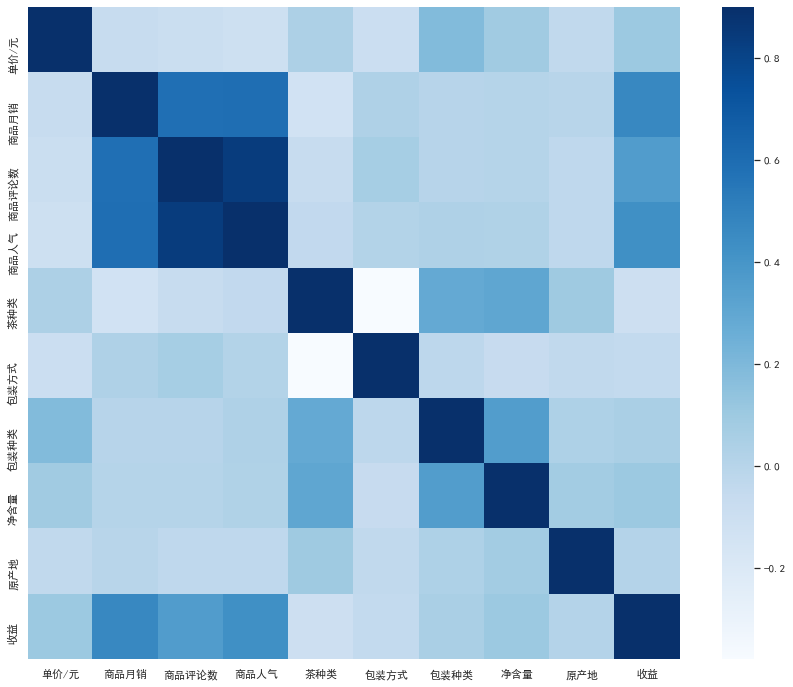

In [21]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

corr = dataset.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [22]:
ss = MinMaxScaler()
scale_features = ['单价/元','商品月销','商品评论数','商品人气','茶种类','包装方式','包装种类','净含量','原产地']
dataset[scale_features] = ss.fit_transform(dataset[scale_features])

In [23]:
dataset.columns = ['price','month-sale','comments','collect','types','wrape-way','wrape-kind','weight','locate','income']

In [24]:
dataset.head()

,price,month-sale,comments,collect,types,wrape-way,wrape-kind,weight,locate,income
0,0.038189,0.003853,0.000999,0.003239,0.00,0.0,0.0,0.007675,0.0,10.873755
1,0.123282,0.088157,0.021998,0.025585,0.05,0.0,0.0,0.032702,0.0,15.131730
2,0.092339,0.077025,0.019978,0.022652,0.05,0.0,0.0,0.019354,0.5,14.714507
3,0.069648,0.029370,0.007618,0.013803,0.10,0.0,0.0,0.032702,0.0,13.477070
4,0.063975,0.096948,0.124443,0.063719,0.05,0.0,0.0,0.032702,0.5,14.589423


In [25]:
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [26]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [27]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=x_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train,
                                    scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [28]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [29]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.3324 (0.0994)


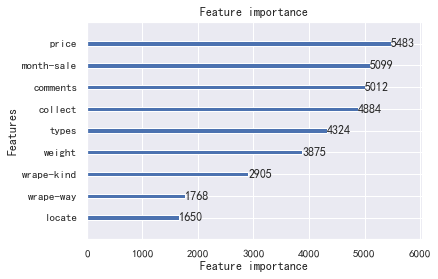

In [30]:
lightgbm.fit(x_train,y_train)
lgb.plot_importance(lightgbm)
plt.show()

In [31]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[17:19:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:24:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


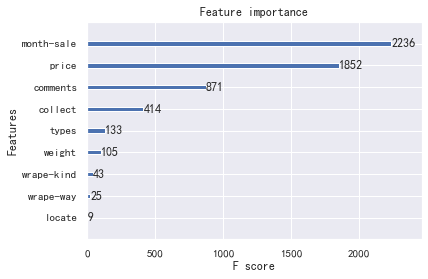

In [32]:
xgboost.fit(x_train,y_train)
xgb.plot_importance(xgboost)
plt.show()

In [31]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(x_train, y_train)

lightgbm


In [32]:
print('xgboost')
xgb_model_full_data = xgboost.fit(x_train, y_train)

xgboost
[10:58:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.5 * xgb_model_full_data.predict(X)) + \
            (0.5 * lgb_model_full_data.predict(X)))

In [34]:
# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(x_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.025393458668915257


In [38]:
x_train = x_train.drop(['locate','wrape-way','wrape-kind'],axis=1)
x_test = x_test.drop(['locate','wrape-way','wrape-kind'],axis=1)

In [26]:
x_train = x_train.drop(['month-sale'],axis=1)
x_test = x_test.drop(['month-sale'],axis=1)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
dataset_fu = pd.read_excel('福建品种茶(1).xls')

In [3]:
dataset_fu.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,品牌,茶种类,省份,城市,包装方式,包装种类,净含量,商品详情,原产地,收益
0,金骏眉茶叶红茶特级正宗浓香型五虎红金俊眉500g散装罐装2020新茶,149.0,五虎茶叶旗舰店,福建泉州,4090,46814,92846.0,五虎,金骏眉,福建省,武夷山市,包装,罐装,500,品牌名称：五虎\n产品参数：\n生产许可证编号：SC11435078204453\n厂名：武...,2,609410.0
1,买1送3铁观音安溪2020新茶春茶浓香型兰花香乌龙茶非特级散装茶叶,39.0,茶上往来旗舰店,福建泉州,19269,19269,27239.0,茶上往来,铁观音,福建省,泉州市,袋装,袋装,125,产品参数：\n生产许可证编号：SC11435052402141\n厂名：福建省安溪茗森茶业有...,1,751491.0
2,2020新茶金骏眉红茶特级茶叶正宗浓香型金俊眉散装500克罐装送礼,368.0,闽丹茶叶旗舰店,福建泉州,15638,15638,19510.0,闽丹,金骏眉,福建省,武夷山市,包装,罐装,500,产品参数：\n生产许可证编号：SC11435052400881\n厂名：福建省安溪君臣茶叶有...,2,5754784.0
3,师傅之作正山小种红茶特级正宗浓香型散装武夷山茶叶送礼盒装500g,200.0,师傅之作旗舰店,福建泉州,522,522,1743.0,师傅之作,正山小种,福建省,武夷山市,包装,礼盒装,500,产品参数：\n生产许可证编号：SC11435052403667\n厂名：安溪县好如誉生物科技...,2,104400.0
4,芯轩特级参赛铁观音茶叶新茶高山传统铁观音春茶正味兰花香500克,568.0,芯轩茶叶旗舰店,福建泉州,8842,8842,10398.0,芯轩,铁观音,福建省,泉州市,袋装,盒装,500,产品参数：\n生产许可证编号：SC11435052401577\n产品标准号：GB/T195...,1,5022256.0


In [4]:
dataset_fu = dataset_fu.drop(['商品名','店铺名称','商品详情','店铺位置','省份','城市'],axis=1)

In [5]:
t = list(dataset_fu['品牌'].unique())

In [6]:
dataset_fu = dataset_fu.drop(['品牌'],axis=1)

In [7]:
dataset_fu.head()

,单价/元,商品月销,商品评论数,商品人气,茶种类,包装方式,包装种类,净含量,原产地,收益
0,149.0,4090,46814,92846.0,金骏眉,包装,罐装,500,2,609410.0
1,39.0,19269,19269,27239.0,铁观音,袋装,袋装,125,1,751491.0
2,368.0,15638,15638,19510.0,金骏眉,包装,罐装,500,2,5754784.0
3,200.0,522,522,1743.0,正山小种,包装,礼盒装,500,2,104400.0
4,568.0,8842,8842,10398.0,铁观音,袋装,盒装,500,1,5022256.0


In [8]:
print(dataset_fu.dtypes)

单价/元     float64
商品月销       int64
商品评论数      int64
商品人气     float64
茶种类       object
包装方式      object
包装种类      object
净含量        int64
原产地        int64
收益       float64
dtype: object


In [9]:
dataset_fu.isin(['none']).sum()

单价/元     0
商品月销     0
商品评论数    0
商品人气     0
茶种类      0
包装方式     0
包装种类     1
净含量      0
原产地      0
收益       0
dtype: int64

In [10]:
dataset_fu.replace('none','散装',inplace=True)

In [11]:
dataset_chuan = pd.read_excel('四川品种茶(3).xls')

In [12]:
dataset_chuan = dataset_chuan.drop(['商品名','店铺名称','商品详情','店铺位置','省份','城市'],axis=1)

In [13]:
dataset_chuan = dataset_chuan.drop(['品牌'],axis=1)

In [14]:
print(dataset_chuan.dtypes)

单价/元     float64
商品月销       int64
商品评论数      int64
商品人气       int64
茶种类       object
包装方式      object
包装种类      object
净含量        int64
原产地        int64
收益       float64
dtype: object


In [15]:
dataset_chuan.isin(['none']).sum()

单价/元      0
商品月销      0
商品评论数     0
商品人气      0
茶种类       0
包装方式      0
包装种类     20
净含量       0
原产地       0
收益        0
dtype: int64

In [16]:
dataset_chuan.replace('none',0,inplace=True)

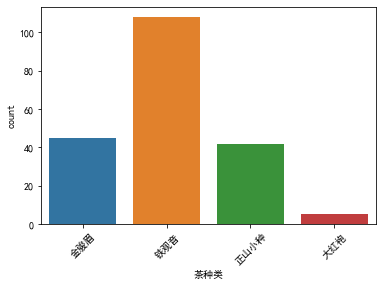

In [21]:
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.xticks(rotation=45)
sns.countplot(dataset_fu['茶种类'])

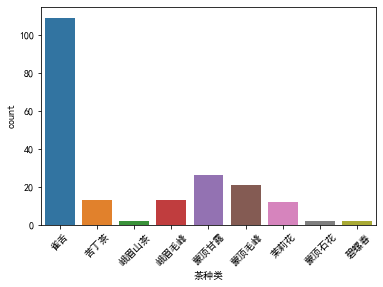

In [22]:
plt.xticks(rotation=45)
sns.countplot(dataset_chuan['茶种类'])

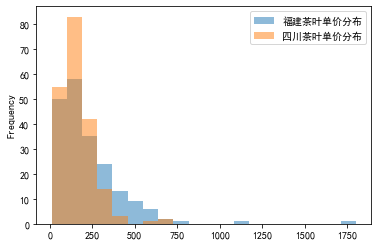

In [28]:
df3 = pd.DataFrame({'福建茶叶单价分布': dataset_fu['单价/元'], '四川茶叶单价分布':dataset_chuan['单价/元']}, columns=['福建茶叶单价分布', '四川茶叶单价分布'])
df3.plot.hist(alpha=0.5,bins=20);

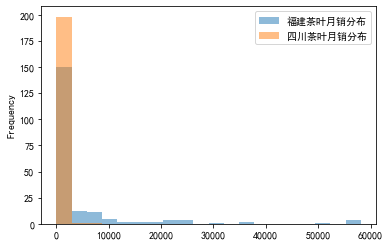

In [29]:
df4 = pd.DataFrame({'福建茶叶月销分布': dataset_fu['商品月销'], '四川茶叶月销分布':dataset_chuan['商品月销']}, columns=['福建茶叶月销分布', '四川茶叶月销分布'])
df4.plot.hist(alpha=0.5,bins=20);

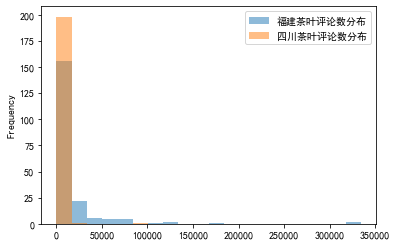

In [30]:
df5 = pd.DataFrame({'福建茶叶评论数分布': dataset_fu['商品评论数'], '四川茶叶评论数分布':dataset_chuan['商品评论数']}, columns=['福建茶叶评论数分布', '四川茶叶评论数分布'])
df5.plot.hist(alpha=0.5,bins=20);

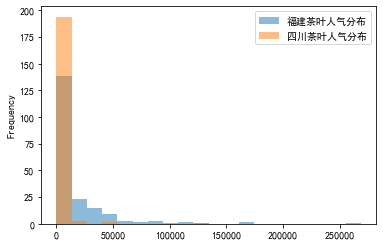

In [31]:
df6 = pd.DataFrame({'福建茶叶人气分布': dataset_fu['商品人气'], '四川茶叶人气分布':dataset_chuan['商品人气']}, columns=['福建茶叶人气分布', '四川茶叶人气分布'])
df6.plot.hist(alpha=0.5,bins=20);

In [61]:
s1 = list(dataset['茶种类'].unique())
s2 = list(dataset['包装方式'].unique())
s3 = list(dataset['包装种类'].unique())
print(s1," ",s2," ",s3)
x1 = pd.DataFrame(dataset['茶种类'].value_counts())
x2 = pd.DataFrame(dataset['包装方式'].value_counts())
x3 = pd.DataFrame(dataset['包装种类'].value_counts())
print(x1,' ',x2,' ',x3)

['金骏眉', '铁观音', '正山小种', '大红袍']   ['包装', '袋装', '食用农产品', '散装']   ['罐装', '袋装', '礼盒装', '盒装', '散装']
      茶种类
铁观音   108
金骏眉    45
正山小种   42
大红袍     5          包装方式
袋装      101
包装       77
食用农产品    15
散装        7        包装种类
礼盒装    67
罐装     58
盒装     46
袋装     25
散装      4


In [62]:
print('Dataset shape:', dataset.shape)

Dataset shape: (200, 10)


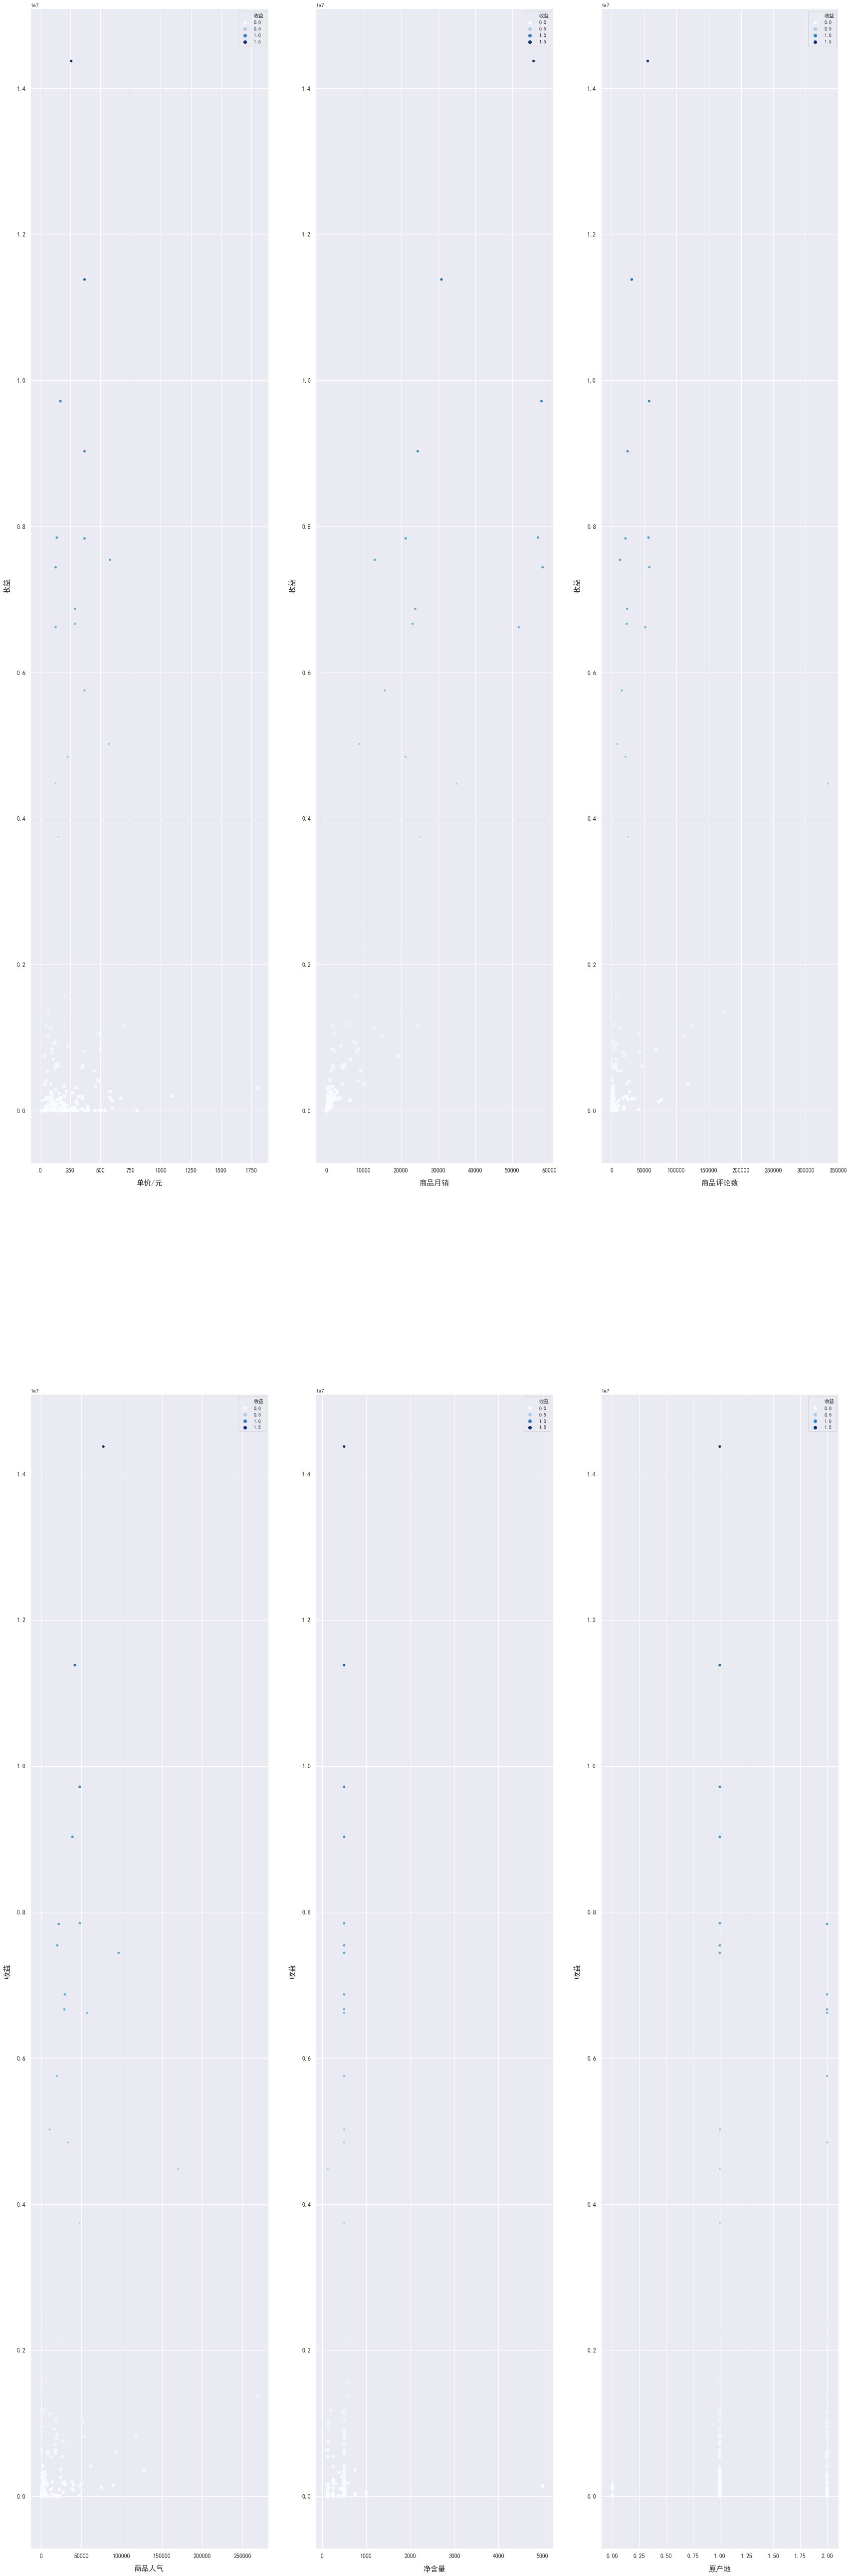

In [63]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

numeric_dtypes = ['int64','float64']
numeric = []
for i in dataset.columns:
    if dataset[i].dtype in numeric_dtypes:
        if i in ['收益']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(dataset[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='收益', hue='收益', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('收益', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

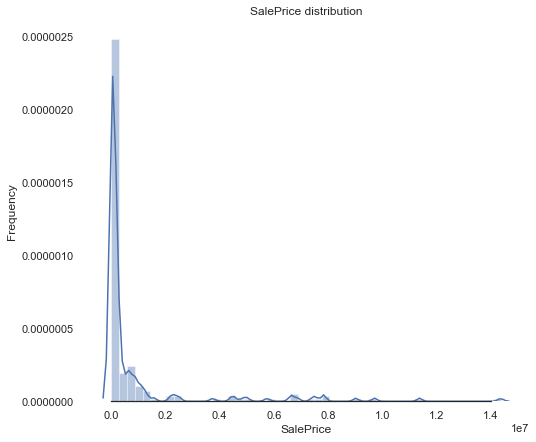

In [64]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [65]:
# log(1+x) transform
dataset["收益"] = np.log1p(dataset["收益"])


 mu = 11.10 and sigma = 2.70



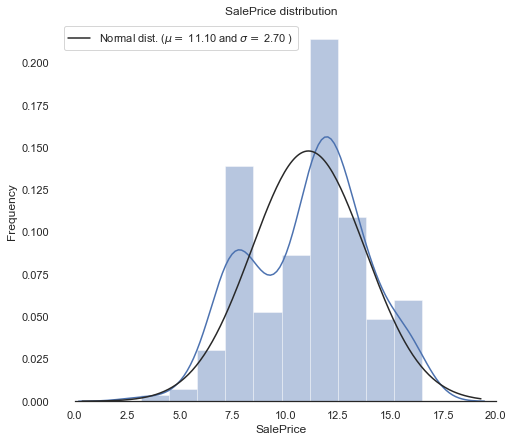

In [66]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['收益'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [67]:
dataset['茶种类'] = dataset['茶种类'].map({'金骏眉':0, '铁观音':1, '正山小种':2, '大红袍':3})
dataset['包装方式'] = dataset['包装方式'].map({'包装':0, '散装':1, '食用农产品':2, '袋装':3})
dataset['包装种类'] = dataset['包装种类'].map({'罐装':0, '散装':1, '礼盒装':2, '袋装':3, '盒装':4})

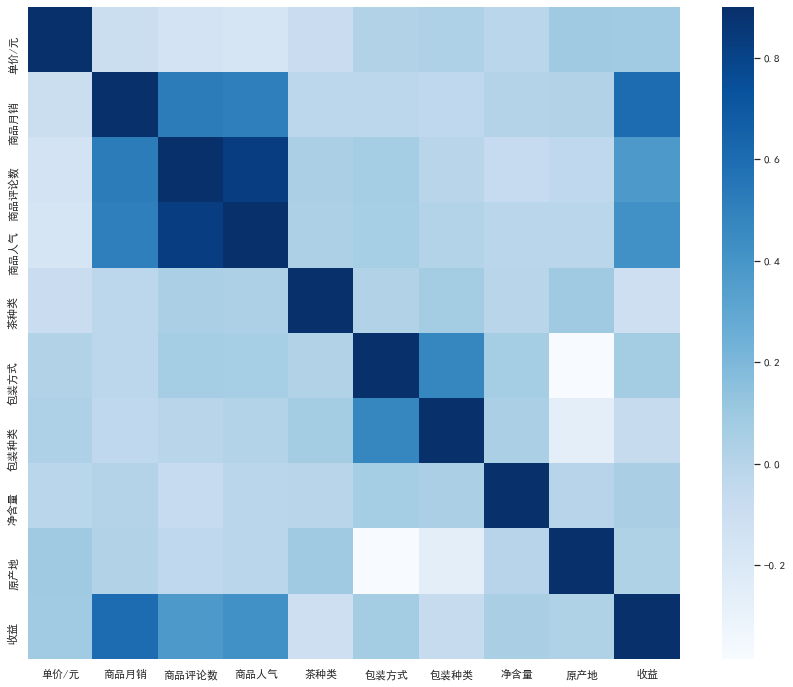

In [68]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

corr = dataset.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [69]:
ss = MinMaxScaler()
scale_features = ['单价/元','商品月销','商品评论数','商品人气','茶种类','包装方式','包装种类','净含量','原产地']
dataset[scale_features] = ss.fit_transform(dataset[scale_features])

In [70]:
dataset.columns = ['price','month-sale','comments','collect','types','wrape-way','wrape-kind','weight','locate','income']

In [71]:
dataset.head()

,price,month-sale,comments,collect,types,wrape-way,wrape-kind,weight,locate,income
0,0.077705,0.070335,0.140074,0.345619,0.000000,0.0,0.00,0.081633,1.0,13.320248
1,0.016256,0.331430,0.057655,0.101392,0.333333,1.0,0.75,0.005102,0.5,13.529816
2,0.200045,0.268973,0.046791,0.072620,0.000000,0.0,0.00,0.081633,1.0,15.565542
3,0.106195,0.008962,0.001562,0.006481,0.666667,0.0,0.50,0.081633,1.0,11.555995
4,0.311770,0.152074,0.026456,0.038700,0.333333,1.0,1.00,0.081633,0.5,15.429390


In [72]:
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [73]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [74]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=x_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train,
                                    scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [75]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [76]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.5188 (0.1983)


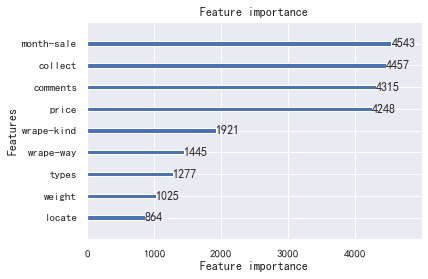

In [77]:
lightgbm.fit(x_train,y_train)
lgb.plot_importance(lightgbm)
plt.show()

In [78]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[14:43:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:45:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


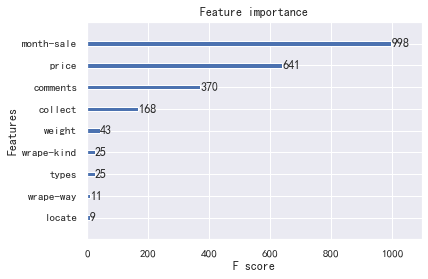

In [79]:
xgboost.fit(x_train,y_train)
xgb.plot_importance(xgboost)
plt.show()

In [80]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(x_train, y_train)

lightgbm


In [81]:
print('xgboost')
xgb_model_full_data = xgboost.fit(x_train, y_train)

xgboost
[14:47:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.5 * xgb_model_full_data.predict(X)) + \
            (0.5 * lgb_model_full_data.predict(X)))

In [83]:
# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(x_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.16025687953381634


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [3]:
dataset.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,品牌,茶种类,省份,城市,包装方式,包装种类,净含量,商品详情,原产地,收益
0,[2020新茶现货]早春雀舌茶叶特级明前高山绿茶春茶四川竹叶茶罐装,118.0,臻尖茶叶旗舰店,四川成都,449,4221,13652,臻尖,雀舌,四川省,雅安市,包装,罐装,100,品牌名称：臻尖\n产品参数：\n生产许可证编号：SC11451180300391\n产品标准...,2,52982.0
1,2020新茶小叶苦丁茶青山绿水四川峨眉山野生正品苦丁茶叶125g*2,24.6,花与树叶,四川乐山,1137,4075,4651,花与树叶,苦丁茶,四川省,峨眉山市,包装,袋装,250,生产许可证编号:SC11451118100223\n产品标准号:Q/GDC0001S\n厂名...,1,27970.2
2,2020新茶四川峨眉山竹叶青特级品味明前绿茶茶叶礼盒120g,350.0,romanticbear888,四川成都,25,87,103,竹叶青,峨眉山茶,四川省,乐山市,包装,礼盒装,120,生产许可证编号:SC11451118100032\n厂名:四川省峨眉山竹叶青茶业有限公司\n...,2,8750.0
3,绿茶2020新茶叶散装非特级四川峨眉山500g素毛峰素茶浓香型,55.0,tb6491171_2011,四川乐山,558,577,12885,none,峨眉毛峰,四川省,乐山市,散装,散装,500,生产许可证编号:SC11451112900013\n厂名:沐川县睿利茶厂\n厂址:沐川县沐溪...,1,30690.0
4,蒙顶甘露绿茶2020新茶四川特级蒙顶山茶浓香型明前茶叶散装250g,128.0,姿雅茶业,四川雅安,211,1386,2889,蒙顶山茶,蒙顶甘露,四川省,雅安市,食用农产品,散装,250,品牌:蒙顶山茶\n系列:蒙顶甘露\n形状:条形\n产地:中国大陆\n省份:四川省\n城市:雅...,1,27008.0


In [5]:
dataset.head()

,单价/元,商品月销,商品评论数,商品人气,品牌,茶种类,包装方式,包装种类,净含量,原产地,收益
0,118.0,449,4221,13652,臻尖,雀舌,包装,罐装,100,2,52982.0
1,24.6,1137,4075,4651,花与树叶,苦丁茶,包装,袋装,250,1,27970.2
2,350.0,25,87,103,竹叶青,峨眉山茶,包装,礼盒装,120,2,8750.0
3,55.0,558,577,12885,none,峨眉毛峰,散装,散装,500,1,30690.0
4,128.0,211,1386,2889,蒙顶山茶,蒙顶甘露,食用农产品,散装,250,1,27008.0


In [10]:
dataset.isin(['none']).sum()

单价/元     0
商品月销     0
商品评论数    0
商品人气     0
茶种类      0
包装方式     0
包装种类     0
净含量      0
原产地      0
收益       0
dtype: int64

In [11]:
print('Dataset shape:', dataset.shape)

Dataset shape: (200, 10)


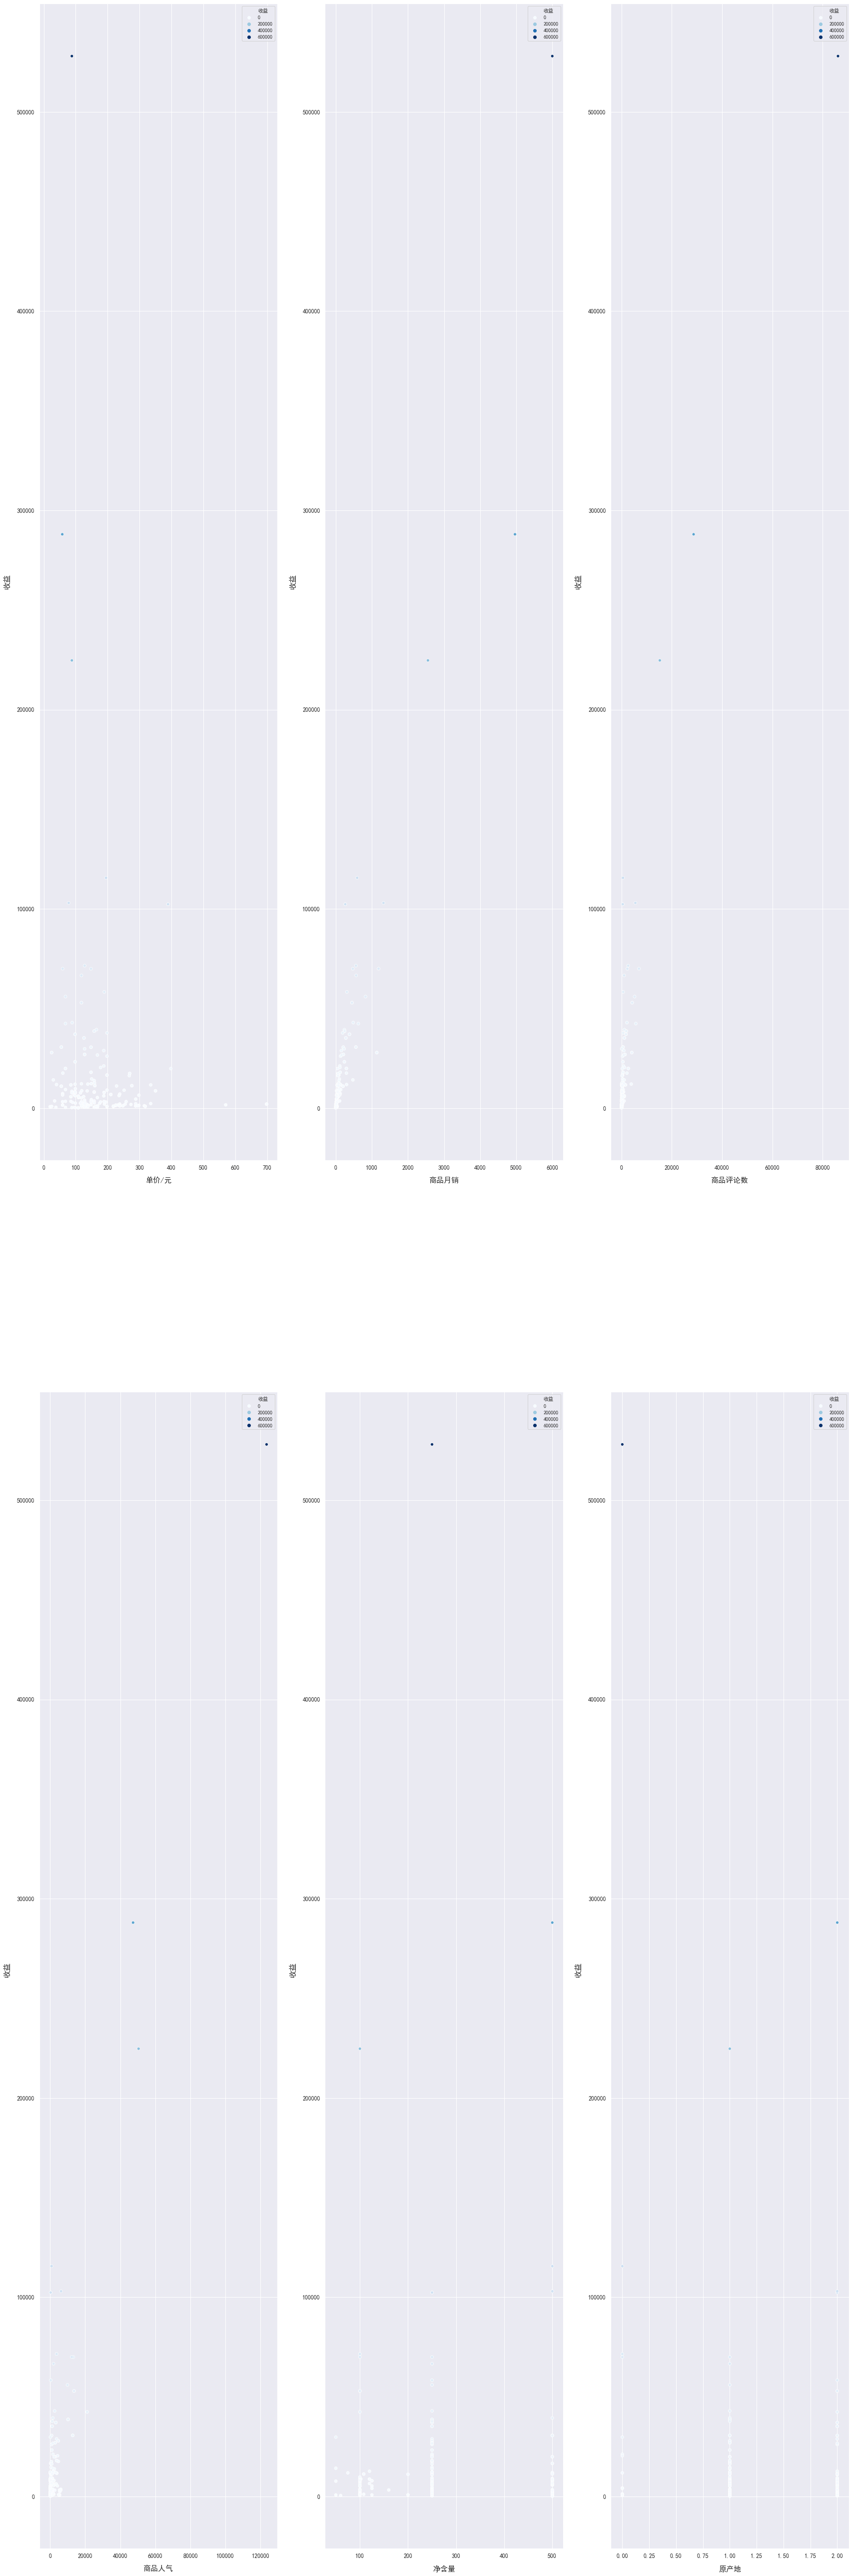

In [12]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

numeric_dtypes = ['int64','float64']
numeric = []
for i in dataset.columns:
    if dataset[i].dtype in numeric_dtypes:
        if i in ['收益']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(dataset[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='收益', hue='收益', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('收益', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

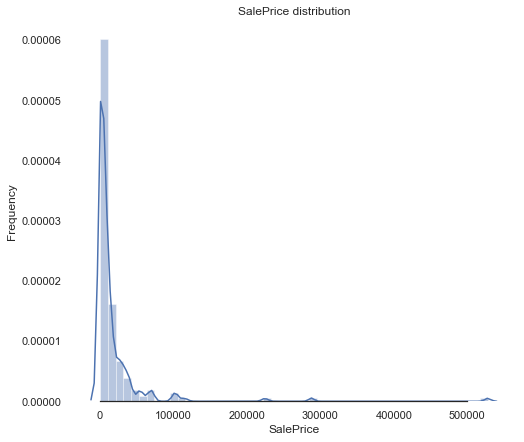

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [14]:
# log(1+x) transform
dataset["收益"] = np.log1p(dataset["收益"])


 mu = 8.64 and sigma = 1.50



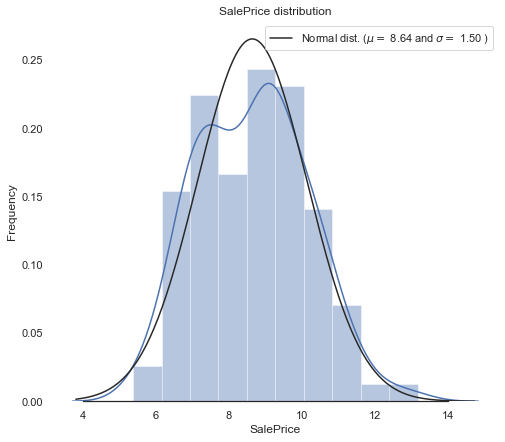

In [15]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['收益'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [16]:
s1 = list(dataset['茶种类'].unique())
s2 = list(dataset['包装方式'].unique())
s3 = list(dataset['包装种类'].unique())
print(s1," ",s2," ",s3)
x1 = pd.DataFrame(dataset['茶种类'].value_counts())
x2 = pd.DataFrame(dataset['包装方式'].value_counts())
x3 = pd.DataFrame(dataset['包装种类'].value_counts())
print(x1,' ',x2,' ',x3)

['雀舌', '苦丁茶', '峨眉山茶', '峨眉毛峰', '蒙顶甘露', '蒙顶毛峰', '茉莉花', '蒙顶石花', '碧螺春']   ['包装', '散装', '食用农产品']   ['罐装', '袋装', '礼盒装', '散装', 0, '盒装']
      茶种类
雀舌    109
蒙顶甘露   26
蒙顶毛峰   21
苦丁茶    13
峨眉毛峰   13
茉莉花    12
碧螺春     2
蒙顶石花    2
峨眉山茶    2          包装方式
包装      106
食用农产品    62
散装       32        包装种类
散装     64
罐装     58
盒装     23
0      20
礼盒装    19
袋装     16


In [17]:
dataset['茶种类'] = dataset['茶种类'].map({'碧螺春':0, '雀舌':1, '苦丁茶':2, '峨眉山茶':3, '峨眉毛峰':4, '蒙顶甘露':5, '蒙顶毛峰':6, '茉莉花':7, '蒙顶石花':8})
dataset['包装方式'] = dataset['包装方式'].map({'包装':0, '散装':1, '食用农产品':2})
dataset['包装种类'] = dataset['包装种类'].map({'罐装':1, '散装':2, '礼盒装':3, '袋装':4, '盒装':5})

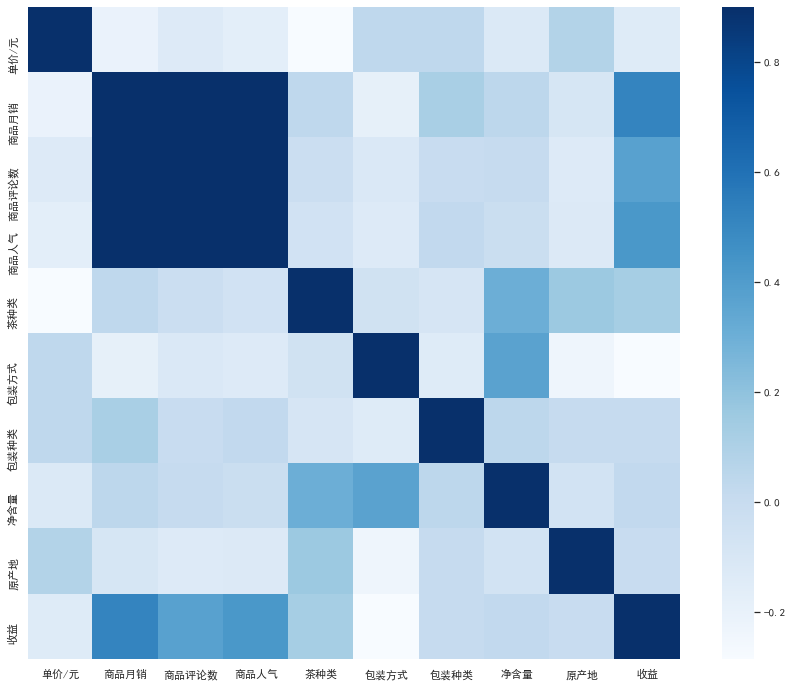

In [18]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

corr = dataset.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [19]:
ss = MinMaxScaler()
scale_features = ['单价/元','商品月销','商品评论数','商品人气','茶种类','包装方式','包装种类','净含量','原产地']
dataset[scale_features] = ss.fit_transform(dataset[scale_features])

In [20]:
dataset.columns = ['price','month-sale','comments','collect','types','wrape-way','wrape-kind','weight','locate','income']

In [21]:
dataset.head()

,price,month-sale,comments,collect,types,wrape-way,wrape-kind,weight,locate,income
0,0.144669,0.074525,0.049026,0.110561,0.125,0.0,0.00,0.111111,1.0,10.877726
1,0.006931,0.189230,0.047330,0.037661,0.250,0.0,0.75,0.444444,0.5,10.238931
2,0.486801,0.003835,0.001010,0.000826,0.375,0.0,0.50,0.155556,1.0,9.076923
3,0.051762,0.092698,0.006702,0.104349,0.500,0.5,0.25,1.000000,0.5,10.331725
4,0.159416,0.034845,0.016098,0.023390,0.625,1.0,0.25,0.444444,0.5,10.203925


In [22]:
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [23]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [24]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=x_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train,
                                    scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [25]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [26]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.3887 (0.1544)


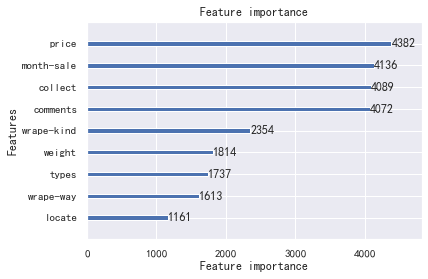

In [27]:
lightgbm.fit(x_train,y_train)
lgb.plot_importance(lightgbm)
plt.show()

In [28]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[15:17:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[15:19:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


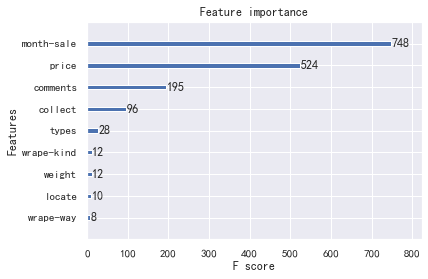

In [29]:
xgboost.fit(x_train,y_train)
xgb.plot_importance(xgboost)
plt.show()

In [30]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(x_train, y_train)

lightgbm


In [31]:
print('xgboost')
xgb_model_full_data = xgboost.fit(x_train, y_train)

xgboost
[15:20:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.5 * xgb_model_full_data.predict(X)) + \
            (0.5 * lgb_model_full_data.predict(X)))

In [33]:
# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(x_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.1571334143330446
